## Pussy Gift. BOOT, ATOM, OSMO, LUNA, HUAHUA, JUNO, DSM, STARS, UMEE, GRAV and EVMOS Analysis

In [1]:
import pandas as pd
import numpy as np
from math import log10
from typing import Optional
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.display import display, HTML

from src.extractor_cosmos_sdk_snapshots import get_balances
from src.utils_charts import grade_boundaries_analysis

In [2]:
initial_boundary_dict = {
    'atom': 0.1,
    'luna': 1,
    'osmo': 1,
    'huahua': 10_000,
    'boot': 10_000,
    'dsm': 30,
    'juno': 0.5,
    'stars': 20,
    'umee': 100,
    'graviton': 100,
    'evmos': 2
}

In [3]:
def set_grade(x: float, boundaries: list) -> Optional[int]:
    if x > boundaries[2]:
        return int(3)
    elif x > boundaries[1]:
        return int(2)
    elif x > boundaries[0]:
        return int(1)
    return None


def analyze_chain(snapshot_url: str,
                  coin: str,
                  coin_for_display: str,
                  initial_boundary: float,
                  max_show_value: int,
                  segment: str,
                  decimals: int = 6,
                  value_transform_func=lambda x: log10(x) if x >= 0.1 else -1.8,
                  balances_items=None) -> [pd.DataFrame, list]:
    if balances_items is None:
        balances_items = ['delegated']
    _balances_df = get_balances(snapshot_url=snapshot_url, coin=coin, decimals=decimals, balances_items=balances_items)
    _balances_agg_df = _balances_df.groupby('balance_coin_rounded')['address'].agg(
        [('number_of_addresses', np.count_nonzero)]).reset_index()

    _boundaries = grade_boundaries_analysis(
        distribution_df=_balances_agg_df,
        value_column='balance_coin_rounded',
        address_column='number_of_addresses',
        address_chart_label='Number of Addresses, log10',
        value_chart_label=f'{coin_for_display} Balance, log10',
        value_name=f'{coin_for_display} Balance',
        value_transform_func=value_transform_func,
        chart_title=f'Distribution of {coin_for_display} Balances by Addresses',
        max_show_value=max_show_value,
        initial_boundary=initial_boundary,
        level_line_shift=0,
        boundary_round=0)

    _balances_df.loc[:, 'grade'] = _balances_df['balance_coin'].map(
        lambda x: set_grade(x, boundaries=_boundaries))
    _balances_df.loc[:, 'segment'] = segment

    return _balances_df, _boundaries

### Get Snapshots
- Bostrom
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 4,939,850 block.
- Chihuahua
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 4,890,535 block.
- Cosmoshub
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 12,948,921 block.
- Desmos
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 6,121,401 block.
- Evmos
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 7,682,206 block.
- Gravity
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 4,684,716 block.
- Juno
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 5,837,080 block.
- Osmosis
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 7,025,000 block.
- Stargaze
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 5,720,382 block.
- Terra
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 2,544,937 block.
- Umee
The snapshot that was used is [here](https://ipfs.io/ipfs/) at the 3,984,825 block.

### Analysis of Grade Boundaries. HUAHUA Owners
HUAHUA balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,10000 < HUAHUA Balance <= 1775462.0,19742,89.0
2,1775462.0 < HUAHUA Balance <= 25416030.0,2217,10.0
3,25416030.0 < HUAHUA Balance,223,1.0


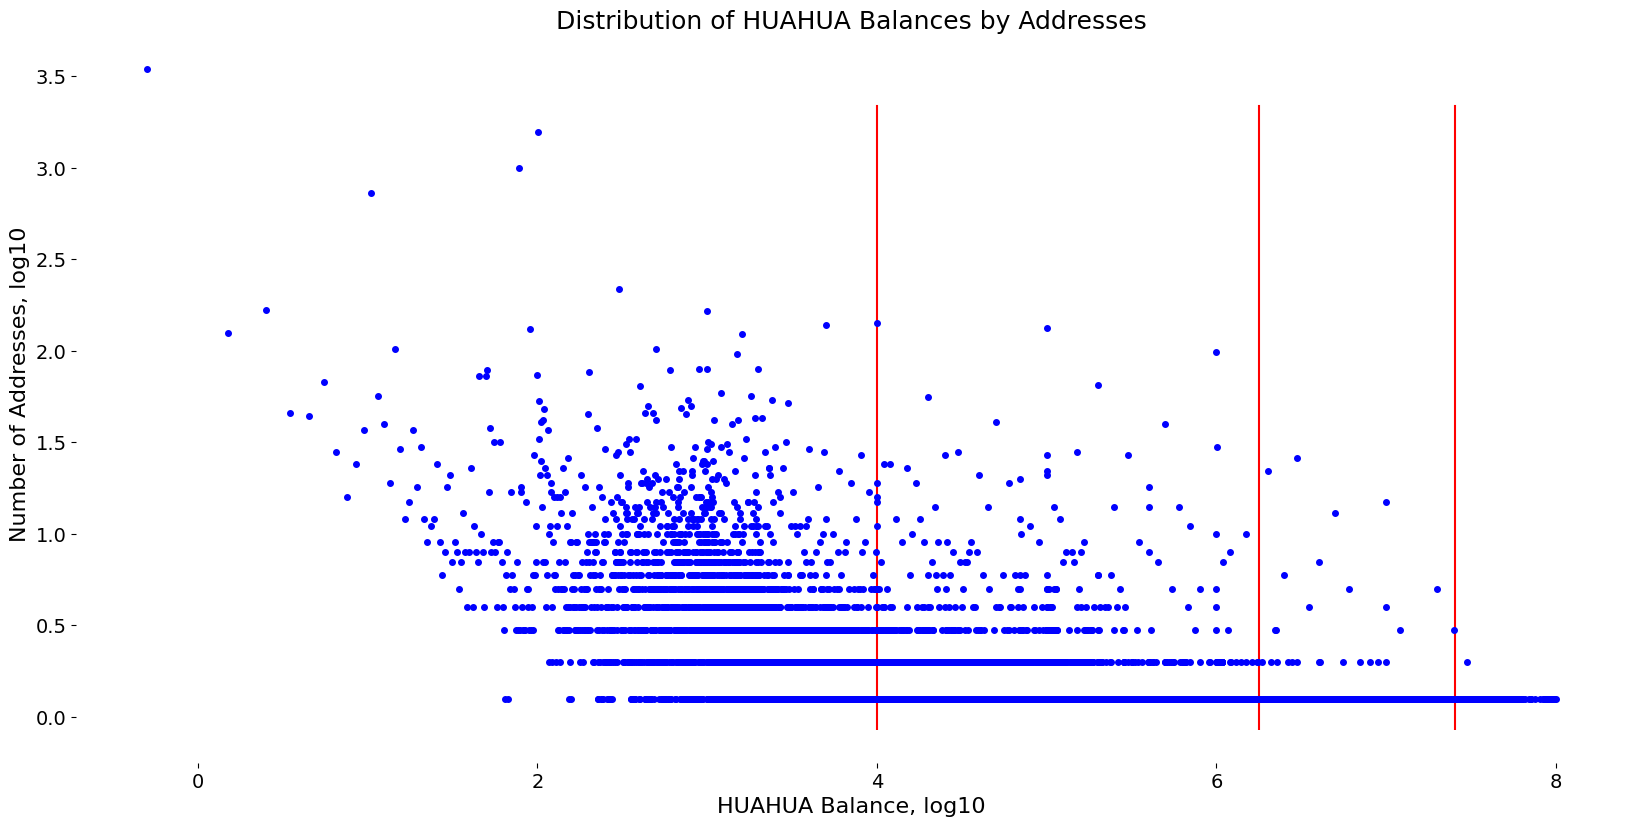

In [4]:
huahua_balances_df, huahua_boundaries = analyze_chain(
    snapshot_url="data/pussy/chihuahua_4890535.json",
    coin='uhuahua',
    coin_for_display='HUAHUA',
    initial_boundary=initial_boundary_dict['huahua'],
    max_show_value=100_000_000,
    segment='ChiHuaHua')

### Analysis of Grade Boundaries. BOOT Owners
BOOT balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,10000 < BOOT Balance <= 1374699066.0,6262,89.0
2,1374699066.0 < BOOT Balance <= 144305883038.0,704,10.0
3,144305883038.0 < BOOT Balance,71,1.0


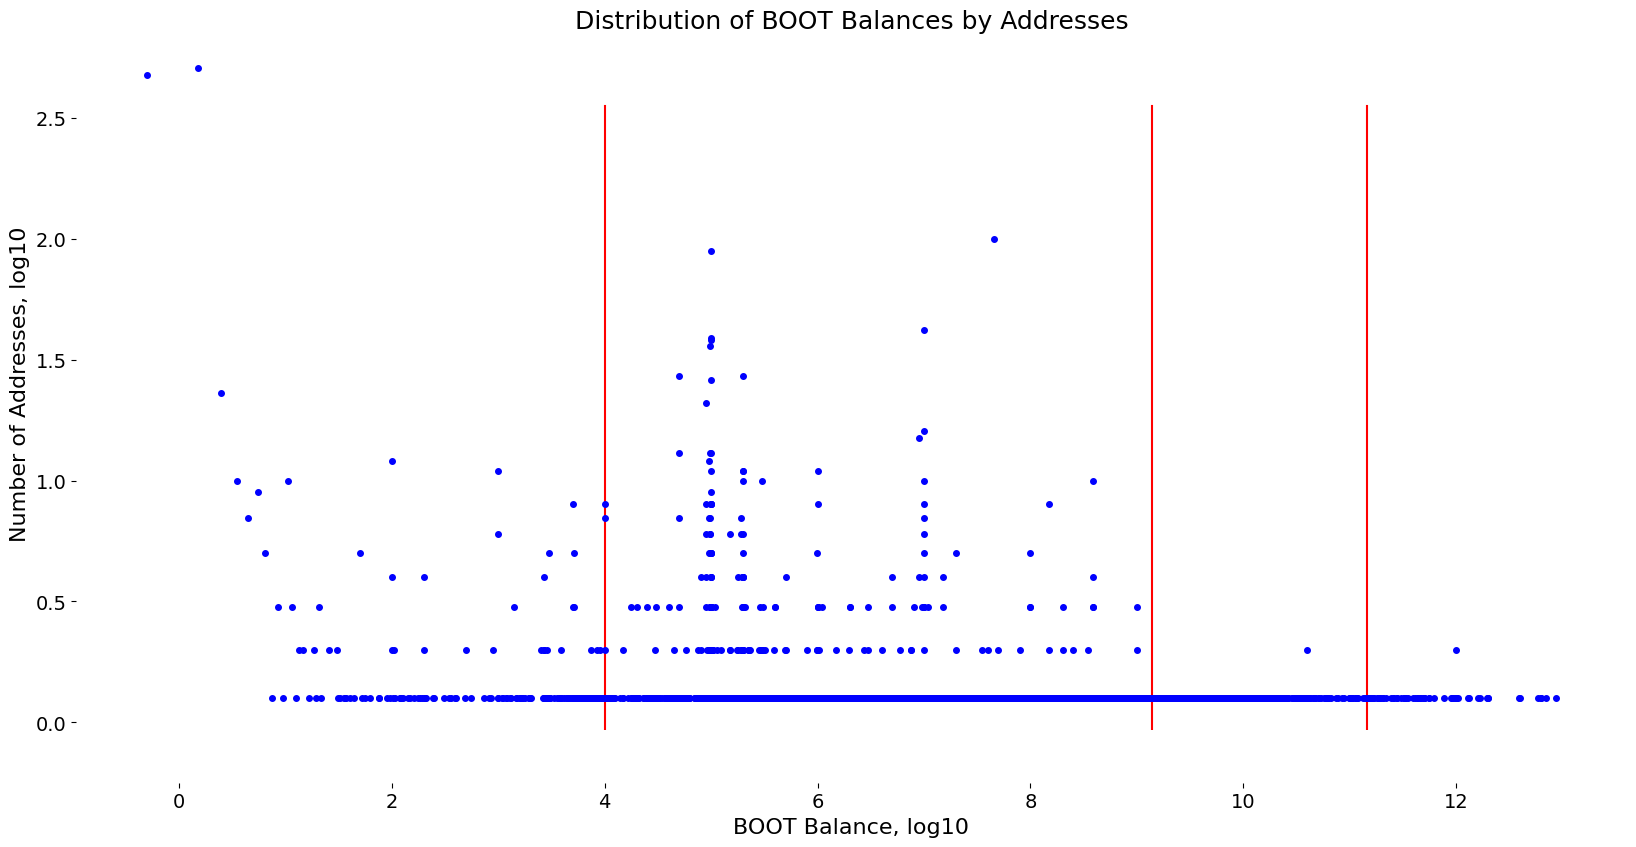

In [5]:
boot_balances_df, boot_boundaries = analyze_chain(
    snapshot_url="data/pussy/bostrom_4939850.json",
    coin='boot',
    coin_for_display='BOOT',
    initial_boundary=initial_boundary_dict['boot'],
    max_show_value=10_000_000_000_000,
    segment='Bostrom',
    decimals=0)

### Analysis of Grade Boundaries. DMS Owners
DMS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,30 < DSM Balance <= 2112.0,6165,89.0
2,2112.0 < DSM Balance <= 142856.0,694,10.0
3,142856.0 < DSM Balance,70,1.0


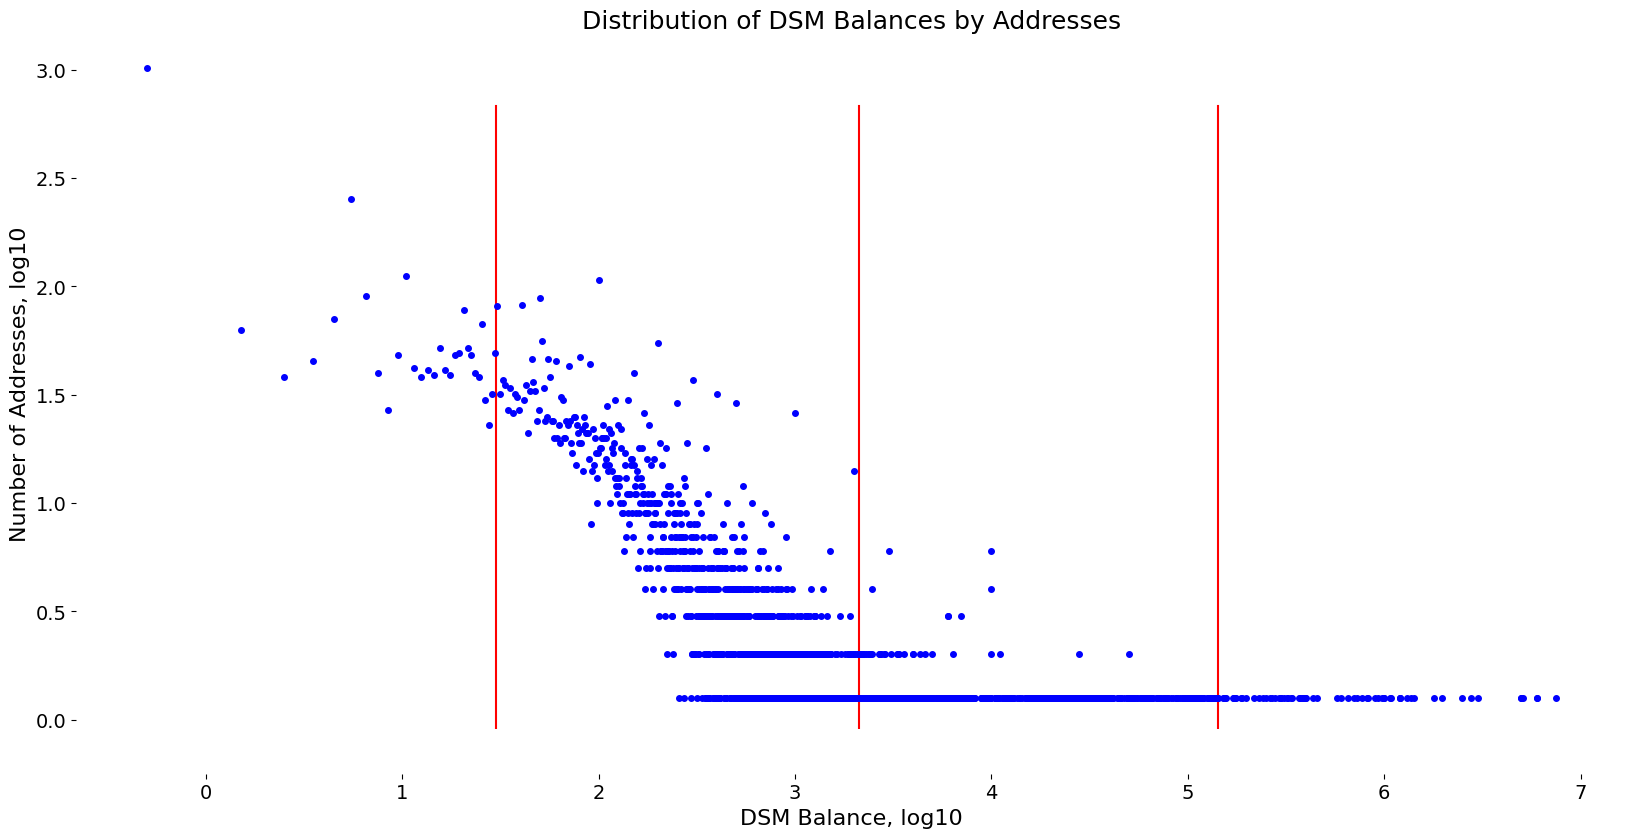

In [6]:
dsm_balances_df, dsm_boundaries = analyze_chain(
    snapshot_url="data/pussy/desmos_6121401.json",
    coin='udsm',
    coin_for_display='DSM',
    initial_boundary=initial_boundary_dict['dsm'],
    max_show_value=1_000_000_000_000,
    segment='Desmos')

### Analysis of Grade Boundaries. GRAV Owners
GRAV balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,100 < GRAV Balance <= 14022.0,5242,89.0
2,14022.0 < GRAV Balance <= 876552.0,589,10.0
3,876552.0 < GRAV Balance,60,1.0


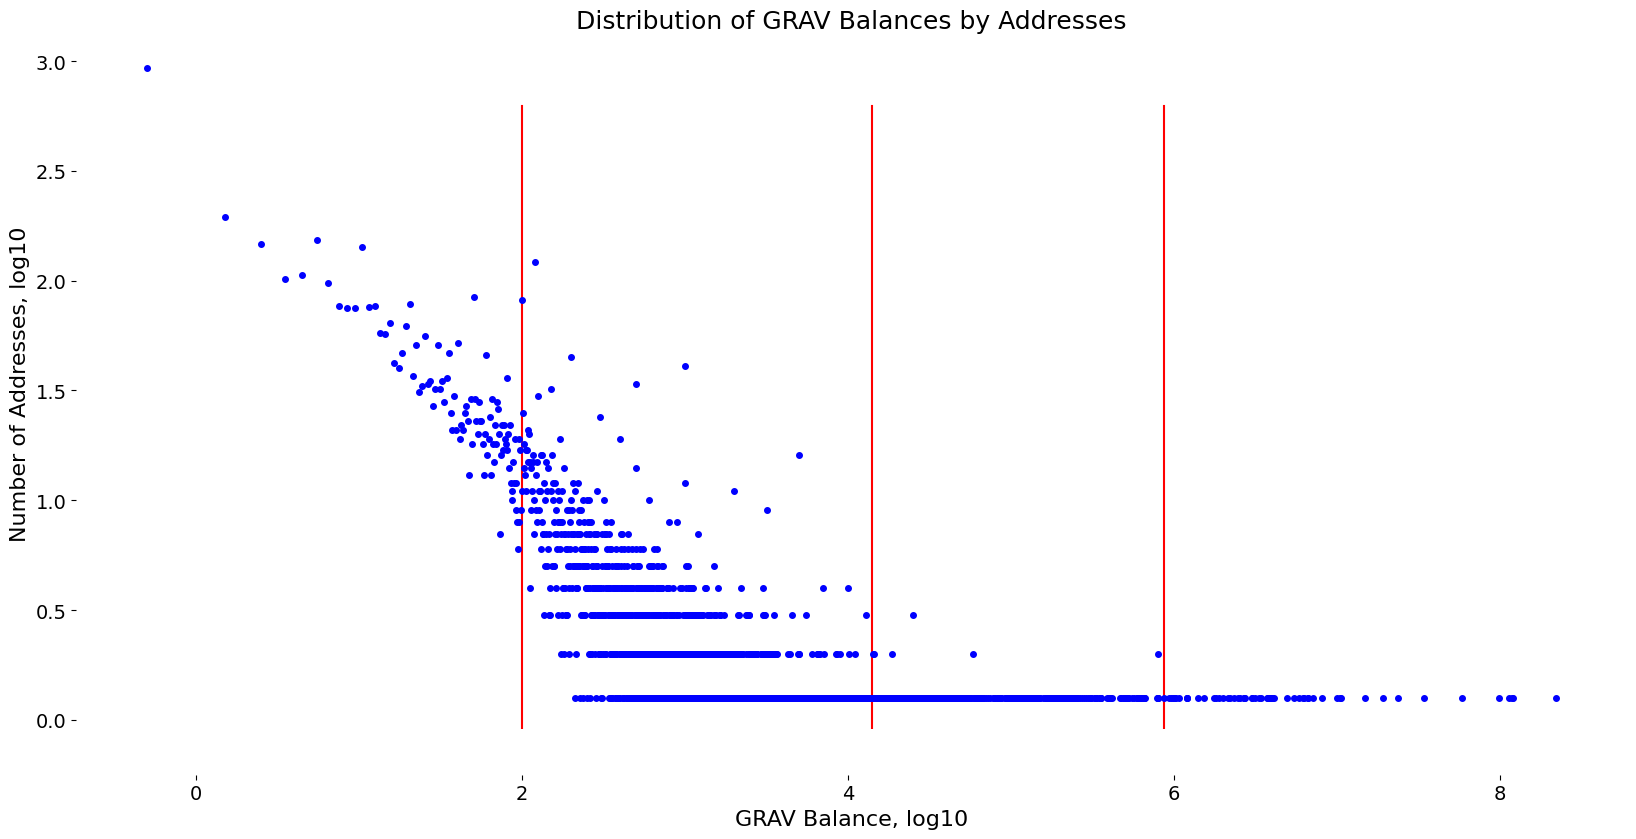

In [7]:
grav_balances_df, grav_boundaries = analyze_chain(
    snapshot_url="data/pussy/gravity_4684716.json",
    coin='ugraviton',
    coin_for_display='GRAV',
    initial_boundary=initial_boundary_dict['graviton'],
    max_show_value=1_000_000_000_000,
    segment='Gravity')

### Analysis of Grade Boundaries. JUNO Owners
JUNO balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.5 < JUNO Balance <= 204.0,91934,88.9
2,204.0 < JUNO Balance <= 4300.0,10417,10.1
3,4300.0 < JUNO Balance,1034,1.0


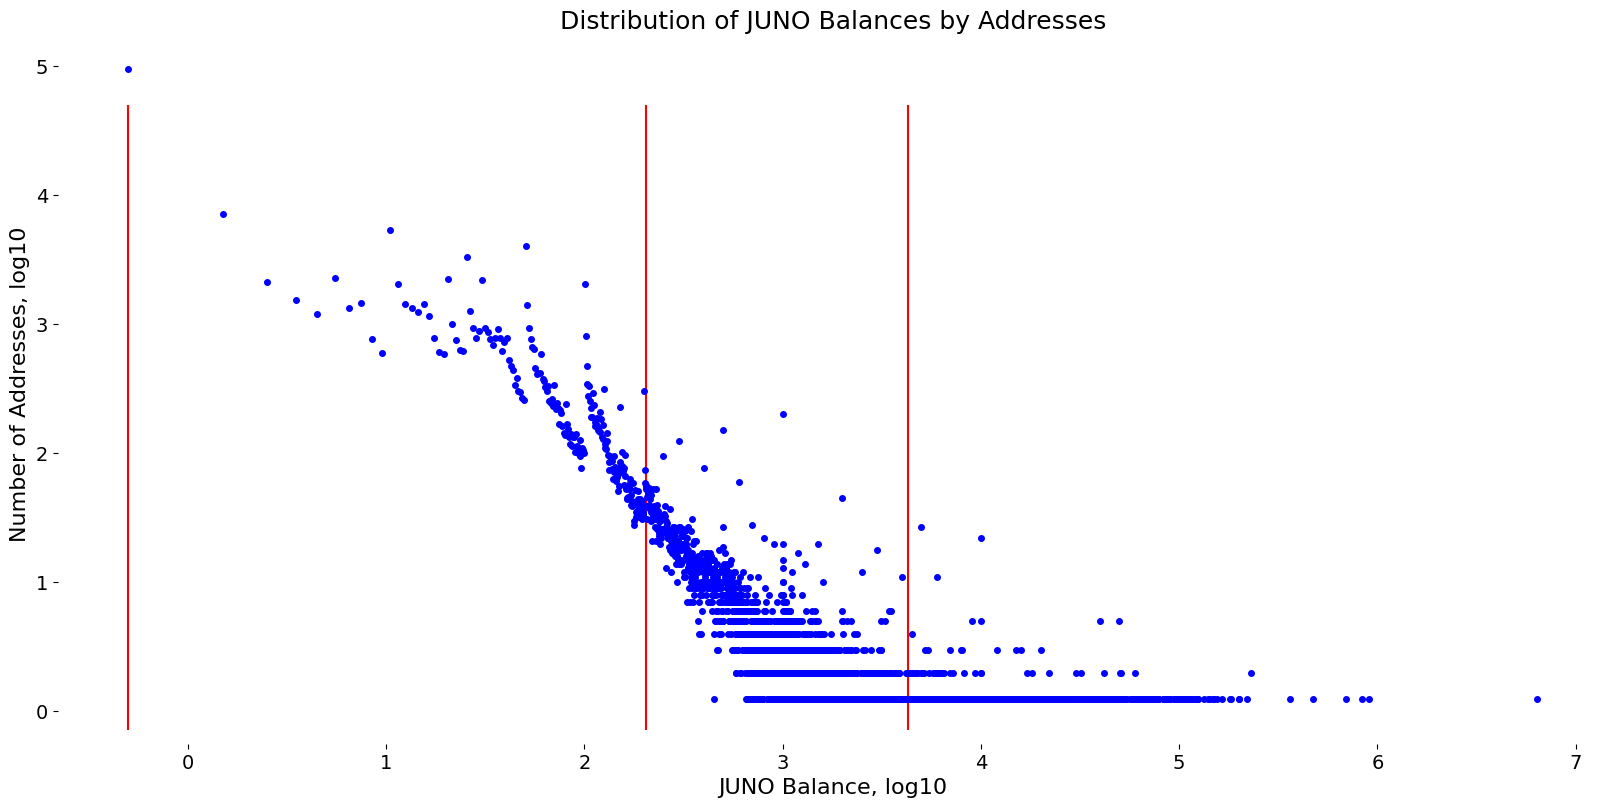

In [8]:
juno_balances_df, juno_boundaries = analyze_chain(
    snapshot_url="data/pussy/juno_5837080.json",
    coin='ujuno',
    coin_for_display='JUNO',
    initial_boundary=initial_boundary_dict['juno'],
    max_show_value=100_000_000,
    segment='Juno')

### Analysis of Grade Boundaries. STARS Owners
STARS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,20 < STARS Balance <= 6122.0,36997,89.0
2,6122.0 < STARS Balance <= 124540.0,4158,10.0
3,124540.0 < STARS Balance,416,1.0


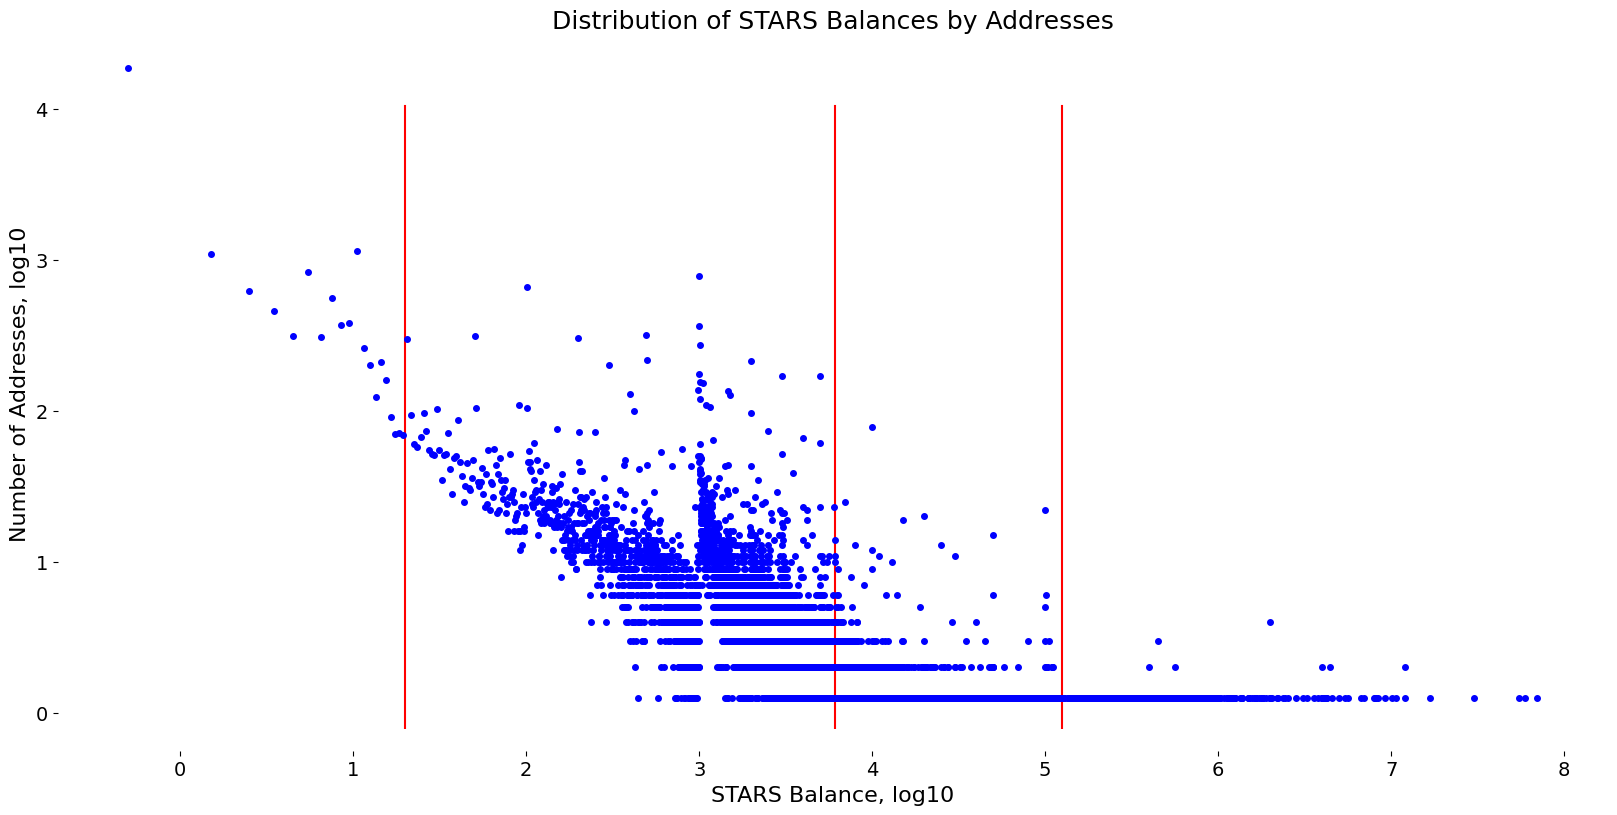

In [9]:
stars_balances_df, stars_boundaries = analyze_chain(
    snapshot_url="data/pussy/stargaze_5720382.json",
    coin='ustars',
    coin_for_display='STARS',
    initial_boundary=initial_boundary_dict['stars'],
    max_show_value=100_000_000,
    segment='Stargaze')

### Analysis of Grade Boundaries. UMEE Owners
UMEE balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,100 < UMEE Balance <= 10568.0,69231,89.0
2,10568.0 < UMEE Balance <= 65542.0,7781,10.0
3,65542.0 < UMEE Balance,779,1.0


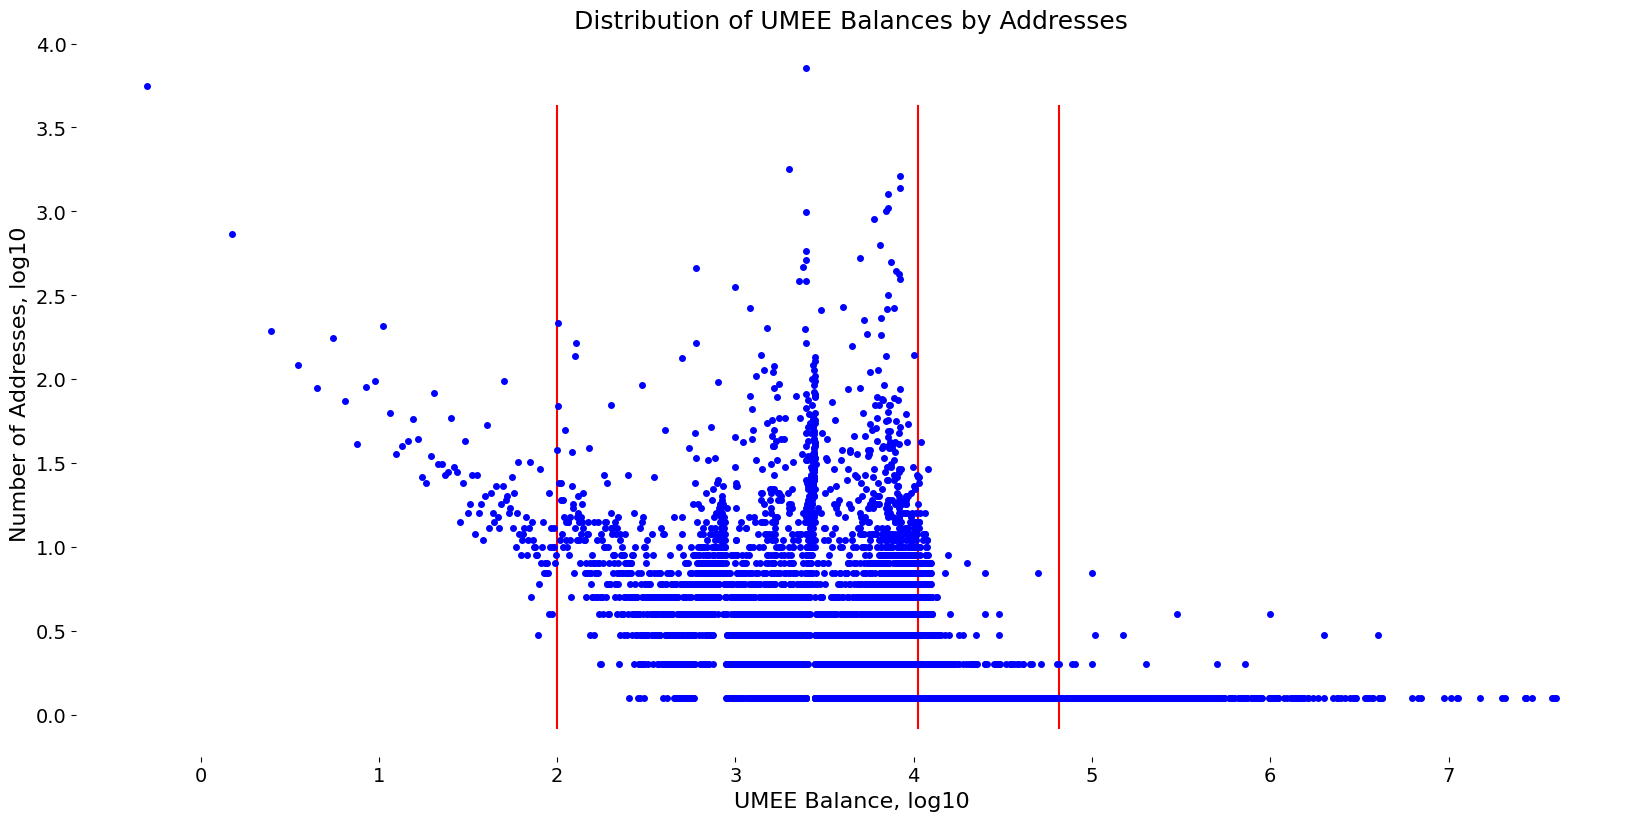

In [10]:
umee_balances_df, umee_boundaries = analyze_chain(
    snapshot_url="data/pussy/umee_3984825.json",
    coin='uumee',
    coin_for_display='UMEE',
    initial_boundary=initial_boundary_dict['umee'],
    max_show_value=50_000_000,
    segment='Umee')

### Analysis of Grade Boundaries. Evmos Owners
EVMOS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,2 < EVMOS Balance <= 746.0,99075,89.0
2,746.0 < EVMOS Balance <= 8622.0,11125,10.0
3,8622.0 < EVMOS Balance,1114,1.0


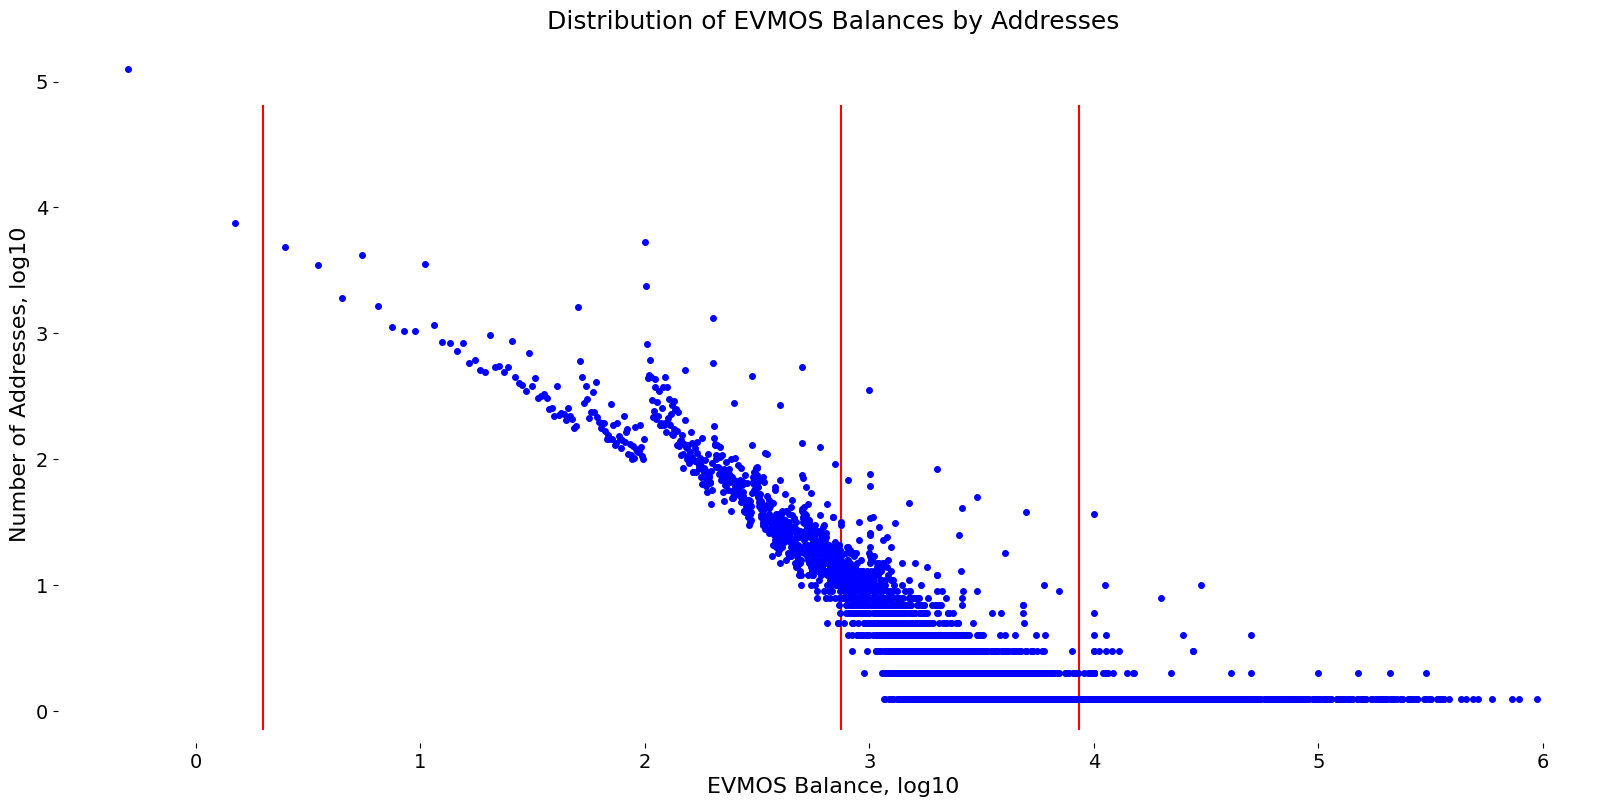

In [11]:
evmos_balances_df, evmos_boundaries = analyze_chain(
    snapshot_url="data/pussy/evmos_7682206.json",
    coin='aevmos',
    coin_for_display='EVMOS',
    initial_boundary=initial_boundary_dict['evmos'],
    max_show_value=1_000_000,
    segment='Evmos',
    decimals=18)

### Analysis of Grade Boundaries. Atom Owners
ATOM balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.1 < ATOM Balance <= 104.0,484596,89.0
2,104.0 < ATOM Balance <= 1858.0,54357,10.0
3,1858.0 < ATOM Balance,5444,1.0


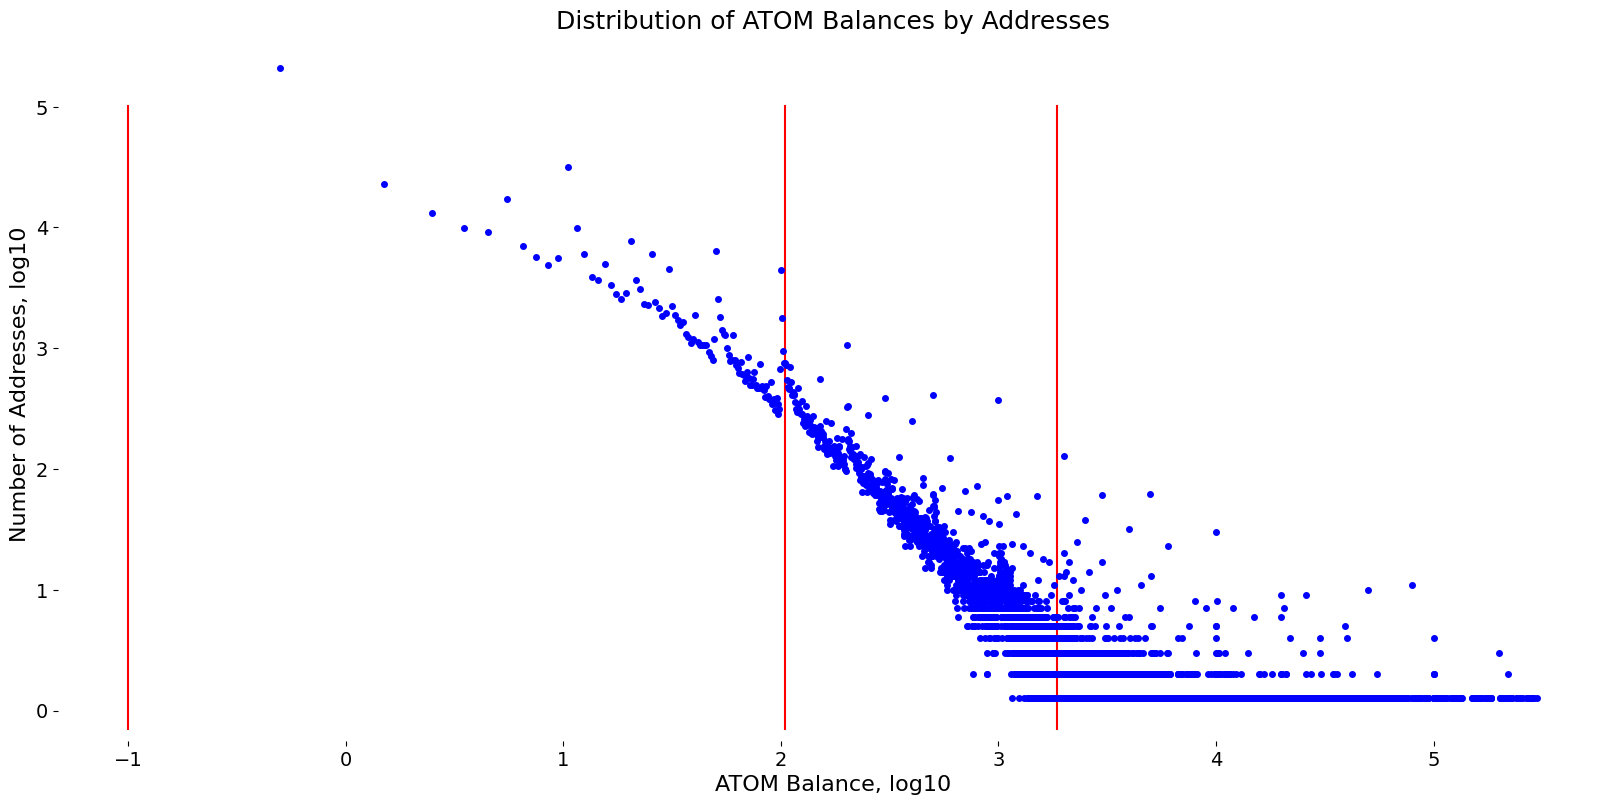

In [12]:
atom_balances_df, atom_boundaries = analyze_chain(
    snapshot_url="data/pussy/cosmoshub_12948921.json",
    coin='uatom',
    coin_for_display='ATOM',
    initial_boundary=initial_boundary_dict['atom'],
    max_show_value=300_000,
    segment='CosmosHub')

### Analysis of Grade Boundaries. Luna Owners
LUNA balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,1 < LUNA Balance <= 386.0,396302,89.0
2,386.0 < LUNA Balance <= 6396.0,44125,9.9
3,6396.0 < LUNA Balance,4980,1.1


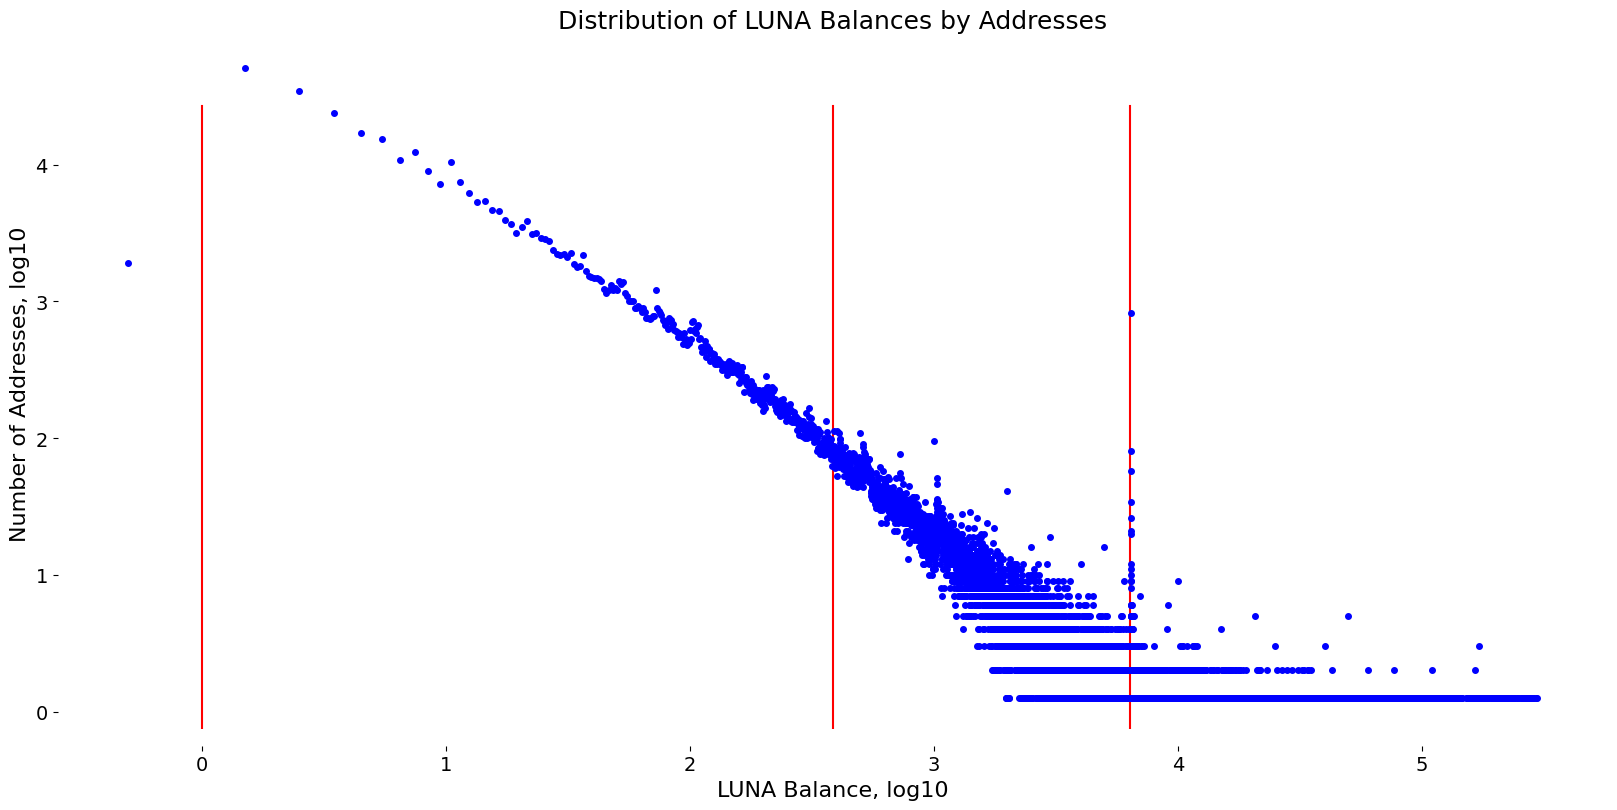

In [13]:
luna_balances_df, luna_boundaries = analyze_chain(
    snapshot_url="data/pussy/terra_2544937.json",
    coin='uluna',
    coin_for_display='LUNA',
    initial_boundary=initial_boundary_dict['luna'],
    max_show_value=300_000,
    segment='Terra')

### Analysis of Grade Boundaries. Osmo Owners and Liquidity Providers
Amounts of liquidity are calculated based on the balances of pool tokens and the balances of staked pool tokens.
Amounts of liquidity are converted into OSMO based on the pool prices.
OSMO balances are calculated as the sum of available, delegated and unbonding balances.
The ranking is based on the sum of pool liquidity and OSMO balances.

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,1 < OSMO Balance <= 498.0,116718,89.0
2,498.0 < OSMO Balance <= 12618.0,13120,10.0
3,12618.0 < OSMO Balance,1313,1.0


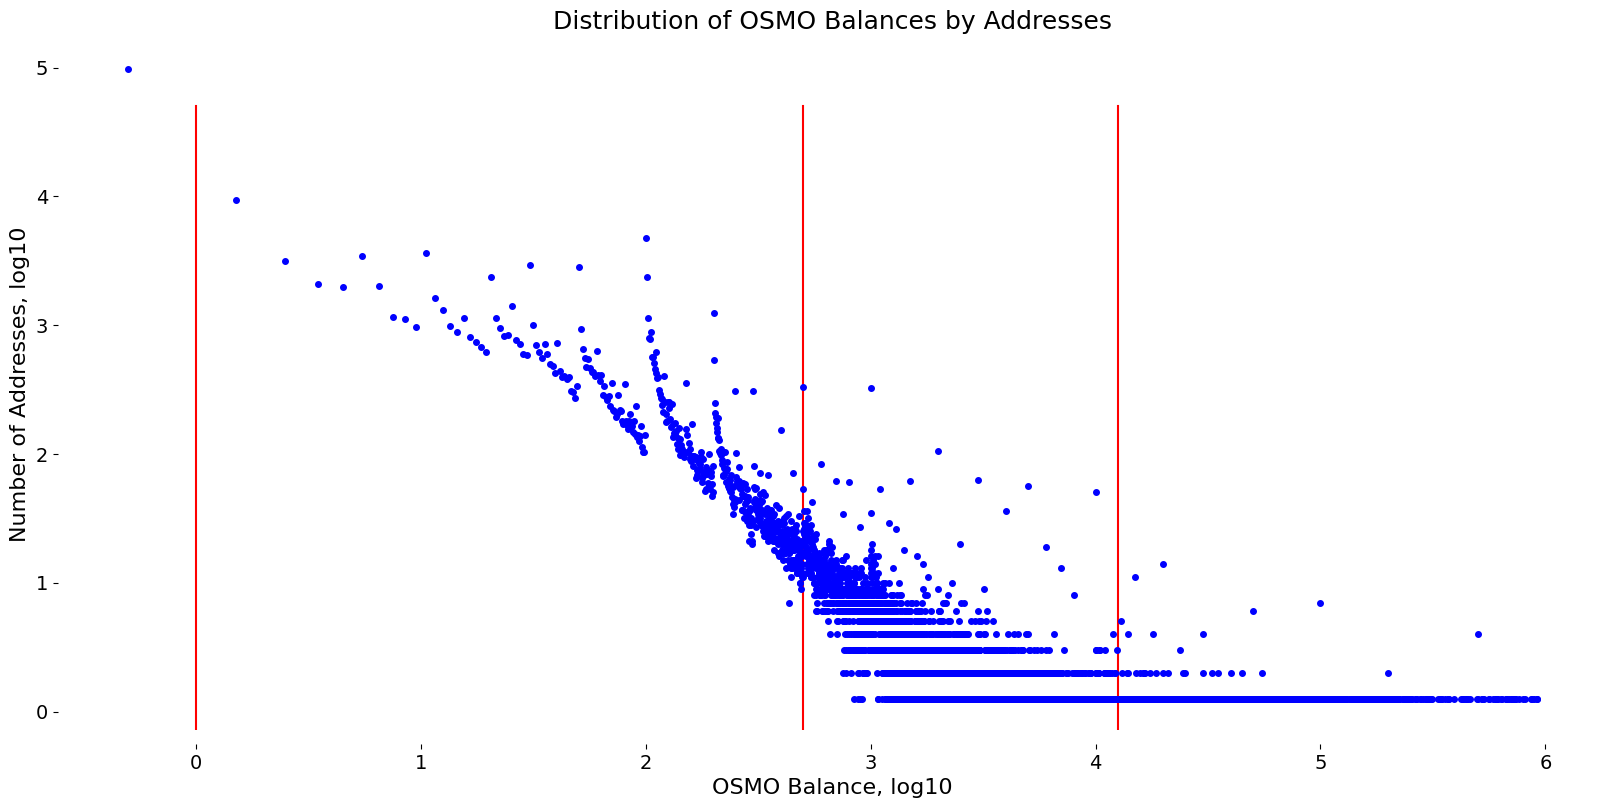

In [14]:
osmo_balances_df, osmo_boundaries = analyze_chain(
    snapshot_url="data/pussy/osmosis_7025000.json",
    coin='uosmo',
    coin_for_display='OSMO',
    initial_boundary=initial_boundary_dict['osmo'],
    max_show_value=1_000_000,
    segment='Osmosis')

### Distribution Rules

<table style="text-align: center">
    <thead>
        <tr>
            <th rowspan=2> </th>
            <th colspan=3>Grade</th>
        </tr>
        <tr>
            <th>1</th>
            <th>2</th>
            <th>3</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left"> BOOT Staking and Liquidity Balance </td>
            <td> > 10,000 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> HUAHUA Staking Balance </td>
            <td> > 10,000 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> ATOM Staking Balance </td>
            <td> > 0.1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> DSM Staking Balance </td>
            <td> > 30 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> EVMOS Staking Balance </td>
            <td> > 1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> GRAV Staking Balance </td>
            <td> > 100 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> JUNO Staking Balance </td>
            <td> > 0.5 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> OSMO Staking Balance and Liquidity </td>
            <td> > 1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> STARS Staking Balance </td>
            <td> > 20 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> LUNA Staking Balance </td>
            <td> > 1 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
        <tr>
            <td style="text-align: left"> UMEE Staking Balance </td>
            <td> > 100 </td>
            <td> > ? </td>
            <td> > ? </td>
        </tr>
    </tbody>
</table>

### Aggregate data

In [27]:
balances_df = pd.concat(
    [atom_balances_df,
     boot_balances_df,
     huahua_balances_df,
     dsm_balances_df,
     grav_balances_df,
     evmos_balances_df,
     osmo_balances_df,
     juno_balances_df,
     stars_balances_df,
     umee_balances_df,
     luna_balances_df])

In [28]:
balances_df[['segment', 'grade']].value_counts()

segment    grade
Terra      1.0      396305
CosmosHub  1.0      320021
Osmosis    1.0      116719
Evmos      1.0       97152
Juno       1.0       94899
Umee       1.0       69058
CosmosHub  2.0       54315
Terra      2.0       44123
Stargaze   1.0       36815
ChiHuaHua  1.0       19614
Osmosis    2.0       13119
Evmos      2.0       11124
Juno       2.0       10410
Umee       2.0        7782
Bostrom    1.0        6254
Desmos     1.0        6124
CosmosHub  3.0        5443
Gravity    1.0        5191
Terra      3.0        4979
Stargaze   2.0        4158
ChiHuaHua  2.0        2217
Osmosis    3.0        1313
Evmos      3.0        1114
Juno       3.0        1034
Umee       3.0         778
Bostrom    2.0         704
Desmos     2.0         695
Gravity    2.0         589
Stargaze   3.0         416
ChiHuaHua  3.0         223
Bostrom    3.0          71
Desmos     3.0          69
Gravity    3.0          60
dtype: int64

In [29]:
balances_df[['segment', 'grade']].value_counts().reset_index().rename(columns={0: 'cnt'}).pivot(index='segment',
                                                                                                columns='grade',
                                                                                                values='cnt')

grade,1.0,2.0,3.0
segment,,,
Bostrom,6254,704,71
ChiHuaHua,19614,2217,223
CosmosHub,320021,54315,5443
Desmos,6124,695,69
Evmos,97152,11124,1114
Gravity,5191,589,60
Juno,94899,10410,1034
Osmosis,116719,13119,1313
Stargaze,36815,4158,416


In [30]:
total_addresses = len(balances_df[['segment', 'grade']])
print(f"Total addresses {total_addresses:>,}")

balances_agg_by_segment_and_grade_df = balances_df[['segment', 'grade']].value_counts().reset_index().rename(
    columns={0: 'cnt'})
balances_agg_by_segment_df = balances_df[['segment']].value_counts().reset_index().rename(columns={0: 'cnt'})
balances_agg_by_grade_df = balances_df[['grade']].value_counts().reset_index().rename(columns={0: 'cnt'})
display(HTML(balances_agg_by_segment_df.to_html(index=False, notebook=True, show_dimensions=False)),
        HTML(balances_agg_by_grade_df.to_html(index=False, notebook=True, show_dimensions=False)))

Total addresses 1,897,080


segment,cnt
CosmosHub,544397
Terra,447305
Evmos,245473
Osmosis,229183
Juno,199650
Umee,87051
Stargaze,67524
ChiHuaHua,48080
Gravity,10489
Desmos,9583


grade,cnt
1.0,1168152
2.0,149236
3.0,15500


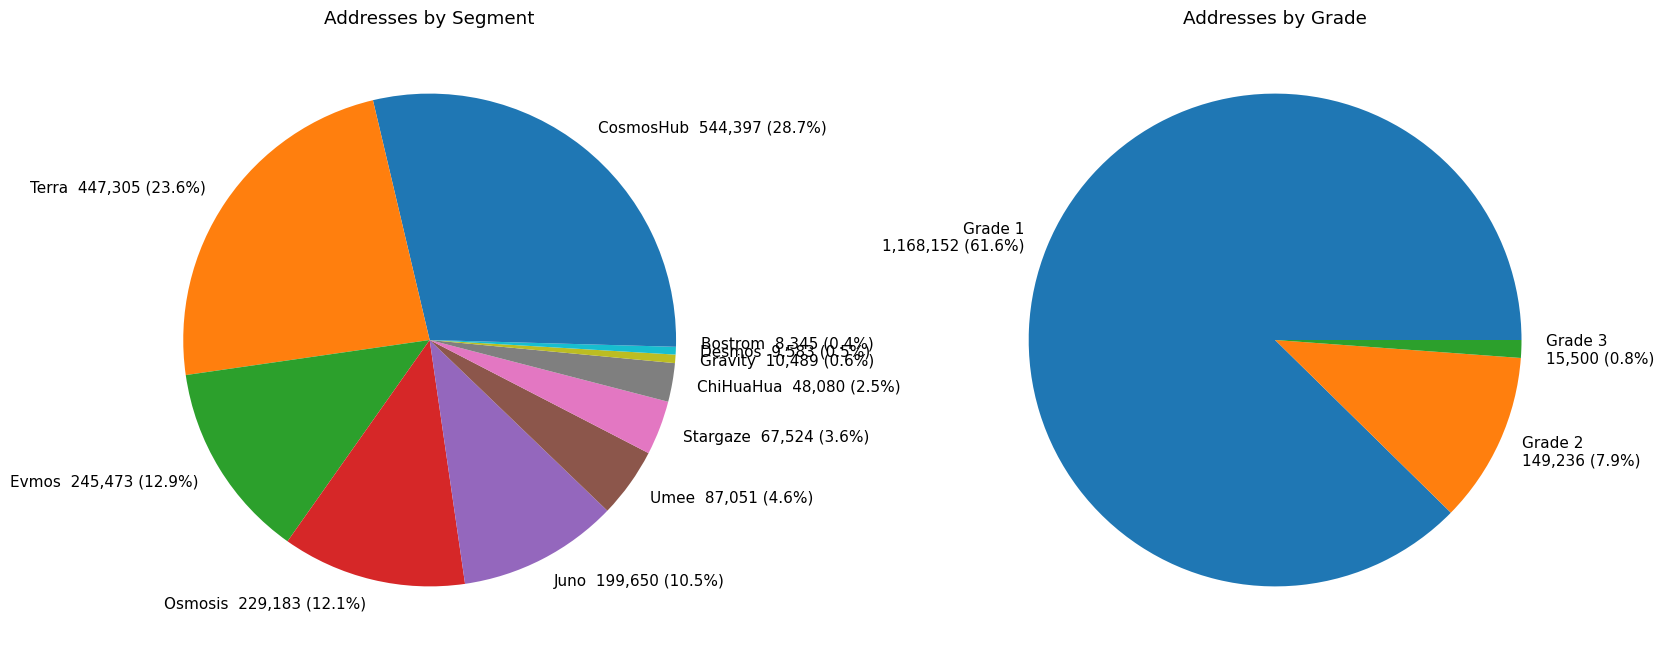

In [31]:
mpl.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams.update({'font.size': 11})

fig, [ax1, ax2] = plt.subplots(ncols=2)

segment_labels = [f'{row.segment}  {row.cnt:>,.0f} ({row.cnt / total_addresses:.1%})' for _, row in
                  balances_agg_by_segment_df.iterrows()]
grade_labels = [f'Grade {int(row.grade)}\n{row.cnt:>,.0f} ({row.cnt / total_addresses:.1%})' for _, row in
                balances_agg_by_grade_df.iterrows()]

ax1.pie(balances_agg_by_segment_df.cnt, labels=segment_labels)
ax1.set_title(label='Addresses by Segment')

ax2.pie(balances_agg_by_grade_df.cnt, labels=grade_labels)
ax2.set_title(label='Addresses by Grade')

plt.show()

## Gift per Address

In [32]:
gift_per_segment = {
    'Bostrom': 20e16,
    'ChiHuaHua': 4e16,
    'CosmosHub': 17e16,
    'Desmos': 2e16,
    'Evmos': 10e16,
    'Gravity': 2e16,
    'Juno': 8e16,
    'Osmosis': 10e16,
    'Stargaze': 5e16,
    'Terra': 12e16,
    'Umee': 5e16
}
total_gift_size = sum(gift_per_segment.values())
print(f'Total Gift Size: {total_gift_size}')

Total Gift Size: 9.5e+17


In [33]:
balances_agg_by_segment_df.loc[:, 'share_of_addresses'] = balances_agg_by_segment_df.cnt / sum(
    balances_agg_by_segment_df.cnt)
balances_agg_by_segment_df.loc[:, 'gift_amount'] = balances_agg_by_segment_df.segment.map(
    lambda segment: gift_per_segment[segment])
balances_agg_by_segment_df.loc[:, 'gift_per_address_avg'] = balances_agg_by_segment_df.apply(
    lambda row: gift_per_segment[row.segment] / row.cnt,
    axis=1)

for i in range(1, 4):
    balances_agg_by_segment_df.loc[:, f'gift_per_address_grade_{i}'] = balances_agg_by_segment_df.apply(
        lambda row: gift_per_segment[row.segment] / 3 / balances_agg_by_segment_and_grade_df[
            (balances_agg_by_segment_and_grade_df.segment == row.segment) & (
                    balances_agg_by_segment_and_grade_df.grade == i)].cnt.values[0],
        axis=1)
    balances_agg_by_segment_df.loc[:, f'cnt_grade_{i}'] = balances_agg_by_segment_df.apply(
        lambda row: balances_agg_by_segment_and_grade_df[
            (balances_agg_by_segment_and_grade_df.segment == row.segment) & (
                    balances_agg_by_segment_and_grade_df.grade == i)].cnt.values[0],
        axis=1)
display(HTML(balances_agg_by_segment_df.to_html(index=False, notebook=True, show_dimensions=False)))

segment,cnt,share_of_addresses,gift_amount,gift_per_address_avg,gift_per_address_grade_1,cnt_grade_1,gift_per_address_grade_2,cnt_grade_2,gift_per_address_grade_3,cnt_grade_3
CosmosHub,544397,0.286966,1.700000e+17,3.122721e+11,1.770717e+11,320021,1.043297e+12,54315,1.041093e+13,5443
Terra,447305,0.235786,1.200000e+17,2.682733e+11,1.009324e+11,396305,9.065567e+11,44123,8.033742e+12,4979
Evmos,245473,0.129395,1.000000e+17,4.073768e+11,3.431050e+11,97152,2.996524e+12,11124,2.992220e+13,1114
Osmosis,229183,0.120808,1.000000e+17,4.363325e+11,2.855862e+11,116719,2.540844e+12,13119,2.538715e+13,1313
Juno,199650,0.105241,8.000000e+16,4.007012e+11,2.810005e+11,94899,2.561639e+12,10410,2.578981e+13,1034
Umee,87051,0.045887,5.000000e+16,5.743759e+11,2.413430e+11,69058,2.141695e+12,7782,2.142245e+13,778
Stargaze,67524,0.035594,5.000000e+16,7.404775e+11,4.527140e+11,36815,4.008337e+12,4158,4.006410e+13,416
ChiHuaHua,48080,0.025344,4.000000e+16,8.319468e+11,6.797865e+11,19614,6.014133e+12,2217,5.979073e+13,223
Gravity,10489,0.005529,2.000000e+16,1.906759e+12,1.284274e+12,5191,1.131862e+13,589,1.111111e+14,60
Desmos,9583,0.005051,2.000000e+16,2.087029e+12,1.088613e+12,6124,9.592326e+12,695,9.661836e+13,69
